# Set working directory and import modules

In [26]:
import os
import util.plot_donkey_ge as pdg
# Change working directory to the root of the repository (assumes notebook working directory is `tutorials`)
os.chdir('/Users/breinsta/Desktop/alfa_research/donkey_ge/')
import main
from util.plot_hd import plot_hawk_and_dove
from fitness.game_theory_game import IntrusiveHawkAndDoveGame
from typing import List, Tuple

# Run the heuristic search

In [27]:
# Set to use the configuration file and output directory
args = ["-o", "tmp", "-f", "tests/configurations/intrusive_hawk_dove.yml"]
_ = main.main(args)

Namespace(coev=False, configuration_file='tests/configurations/intrusive_hawk_dove.yml', output_dir='tmp')
Setting random seed: 1579813387 0.19924
donkey_ge settings: {'population_size': 50, 'max_length': 15, 'elite_size': 20, 'generations': 15, 'tournament_size': 2, 'crossover_probability': 0.8, 'mutation_probability': 0.1, 'codon_size': 127, 'integer_input_element_max': 1000, 'bnf_grammar': 'tests/grammars/simple_hawk_dove.bnf', 'fitness_function': {'name': 'IntrusiveHawkAndDove', 'opponent': "lambda h, i: 'B'", 'n_iterations': 1}, 'output_dir': 'tmp', 'coev': False, 'seed': 1579813387}
Gen:0 t:0.001 fit_ave:1.10+-0.640 size_ave:1.00+-0.000 length_ave:15.00+-0.000 Ind: lambda h, i: "B"; 2.0
Gen:1 t:0.003 fit_ave:1.68+-0.466 size_ave:1.00+-0.000 length_ave:15.00+-0.000 Ind: lambda h, i: "B"; 2.0
Gen:2 t:0.003 fit_ave:2.00+-0.000 size_ave:1.00+-0.000 length_ave:15.00+-0.000 Ind: lambda h, i: "B"; 2.0
Gen:3 t:0.003 fit_ave:2.00+-0.000 size_ave:1.00+-0.000 length_ave:15.00+-0.000 Ind: la

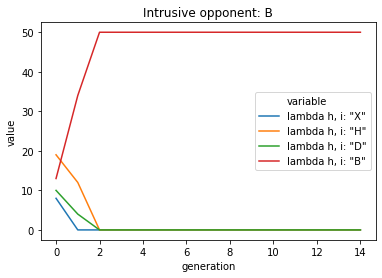

In [28]:
pdg.plot_population_freqs(out_path="tmp", in_path="tmp", title="Intrusive opponent: B")

In [29]:
args = ["-o", "tmp2", "-f", "tests/configurations/nonintrusive_hawk_dove.yml"]
_ = main.main(args)


Namespace(coev=False, configuration_file='tests/configurations/nonintrusive_hawk_dove.yml', output_dir='tmp2')
Setting random seed: 1579813387 0.19924
donkey_ge settings: {'population_size': 50, 'max_length': 15, 'elite_size': 20, 'generations': 15, 'tournament_size': 2, 'crossover_probability': 0.8, 'mutation_probability': 0.1, 'codon_size': 127, 'integer_input_element_max': 1000, 'bnf_grammar': 'tests/grammars/simple_hawk_dove.bnf', 'fitness_function': {'name': 'NonIntrusiveHawkAndDove', 'opponent': "lambda h, i: 'B'", 'n_iterations': 1}, 'output_dir': 'tmp2', 'coev': False, 'seed': 1579813387}
Gen:0 t:0.001 fit_ave:1.46+-0.498 size_ave:1.00+-0.000 length_ave:15.00+-0.000 Ind: lambda h, i: "B"; 2.0
Gen:1 t:0.002 fit_ave:2.00+-0.000 size_ave:1.00+-0.000 length_ave:15.00+-0.000 Ind: lambda h, i: "D"; 2.0
Gen:2 t:0.002 fit_ave:2.00+-0.000 size_ave:1.00+-0.000 length_ave:15.00+-0.000 Ind: lambda h, i: "D"; 2.0
Gen:3 t:0.003 fit_ave:2.00+-0.000 size_ave:1.00+-0.000 length_ave:15.00+-0.000

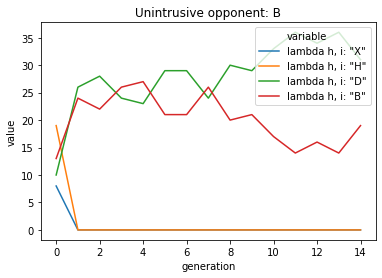

In [30]:
pdg.plot_population_freqs(out_path="tmp2", in_path="tmp2", title="Unintrusive opponent: B")